Общий вид задачи:

$\dfrac{du}{dt} = a\dfrac{d^2u}{dx^2} + b\dfrac{d^2u}{dy^2} + f(x, y, t)$

$\alpha_{1}\dfrac{du}{dx}(0, y) + \beta_{1}u(0, y) = \phi_{1}(y, t)$ <br>
$\alpha_{2}\dfrac{du}{dx}(l_x, y) + \beta_{1}u(l_x, y) = \phi_{2}(y, t)$ <br>
$\alpha_{3}\dfrac{du}{dy}(x, 0) + \beta_{3}u(x, 0) = \phi_{3}(x, t)$ <br>
$\alpha_{4}\dfrac{du}{dy}(x, l_y) + \beta_{3}u(x, l_y) = \phi_{4}(x, t)$ <br>
$u(x, y, 0) = \psi(x, y)$

**Метод переменных направлений**

Схема метода имеет вид

$\dfrac{u^{k + 1/2}_{i,j} - u^{k}_{i,j}}{\tau/2} = a\dfrac{u^{k + 1/2}_{i-1,j} - 2u^{k + 1/2}_{i,j} + u^{k + 1/2}_{i+1,j}}{h^2_x} + b\dfrac{u^{k}_{i,j-1} - 2u^{k}_{i,j} + u^{k}_{i,j+1}}{h^2_y} + f(x_i, y_j, t^{k + 1/2})$

$\dfrac{u^{k + 1}_{i,j} - u^{k + 1/2}_{i,j}}{\tau/2} = a\dfrac{u^{k + 1/2}_{i-1,j} - 2u^{k + 1/2}_{i,j} + u^{k + 1/2}_{i+1,j}}{h^2_x} + b\dfrac{u^{k + 1}_{i,j-1} - 2u^{k + 1}_{i,j} + u^{k + 1}_{i,j+1}}{h^2_y} + f(x_i, y_j, t^{k + 1})$

Проведем ряд преобразований и получим следующие формулы

$(-a\tau h^2_y)u^{k + 1/2}_{i-1,j} + (2h^2_xh^2_y + 2ah^2_y\tau)u^{k + 1/2}_{i,j} + (-a\tau h^2_y)u^{k + 1/2}_{i+1,j} = (u^{k}_{i,j-1} - 2u^{k}_{i,j} + u^{k}_{i,j+1})bh^2_x\tau + 2h^2_xh^2_yu^{k}_{i,j} +  h^2_xh^2_y\tau f(x_i, y_j, t^{k + 1/2})$

$(-b\tau h^2_x)u^{k + 1}_{i,j-1} + (2h^2_xh^2_y + 2bh^2_x\tau)u^{k + 1}_{i,j} + (-b\tau h^2_x)u^{k + 1}_{i,j+1} = (u^{k + 1/2}_{i-1,j} - 2u^{k + 1/2}_{i,j} + u^{k + 1/2}_{i+1,j})ah^2_y\tau + 2h^2_xh^2_yu^{k + 1/2}_{i,j} +  h^2_xh^2_y\tau f(x_i, y_j, t^{k + 1})$

**Метод дробных шагов**

Схема метода имеет вид

$\dfrac{u^{k + 1/2}_{i,j} - u^{k}_{i,j}}{\tau} = a\dfrac{u^{k + 1/2}_{i-1,j} - 2u^{k + 1/2}_{i,j} + u^{k + 1/2}_{i+1,j}}{h^2_x} + \dfrac{f(x_i, y_j, t^{k})}{2}$

$\dfrac{u^{k + 1}_{i,j} - u^{k + 1/2}_{i,j}}{\tau} = b\dfrac{u^{k + 1}_{i,j-1} - 2u^{k + 1}_{i,j} + u^{k + 1}_{i,j+1}}{h^2_y} + \dfrac{f(x_i, y_j, t^{k + 1})}{2}$

Проведем ряд преобразований и получим следующие формулы

$(-2\tau a)u^{k + 1/2}_{i-1,j} + (2h^2_x + 4\tau a)u^{k + 1/2}_{i,j} + (-2\tau a)u^{k + 1/2}_{i+1,j} = 
2h^2_xu^{k}_{i,j} + \tau h^2_xf(x_i, y_j, t^{k})$

$(-2\tau b)u^{k + 1}_{i,j-1} + (2h^2_y + 4\tau b)u^{k + 1}_{i,j} + (-2\tau b)u^{k + 1}_{i,j+1} = 
2h^2_yu^{k + 1/2}_{i,j} + \tau h^2_yf(x_i, y_j, t^{k + 1})$

In [ ]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import copy

In [ ]:
def plotErrorsByT(time, errors):
    errors.reverse()
    plt.figure(figsize=(12, 8))
    plt.xlabel('time')
    plt.ylabel('error')
    plt.title('Errors by time')
    plt.plot(time, errors, color = 'b')

In [ ]:
class Data:

    def __init__(self, ia, ib, iff, iax0, ibx0, ifx0, iaxl, ibxl, ifxl, iay0, iby0, ify0, iayl, ibyl, ifyl, ifpsi, iintervalOnX, iintervalOnY, inx, iny, itime, irealFunction):
        self.a = ia
        self.b = ib
        self.f = iff

        self.ax0 = iax0
        self.bx0 = ibx0
        self.fx0 = ifx0

        self.axl = iaxl
        self.bxl = ibxl
        self.fxl = ifxl

        self.ay0 = iay0
        self.by0 = iby0
        self.fy0 = ify0

        self.ayl = iayl
        self.byl = ibyl
        self.fyl = ifyl

        self.fpsi = ifpsi

        self.intervalOnX = iintervalOnX
        self.intervalOnY = iintervalOnY

        self.nx = inx
        self.ny = iny

        self.time = itime

        self.realFunction = irealFunction

In [ ]:
class Solution:

    @classmethod
    def process(cls, data : Data, method):
        stepX = (data.intervalOnX[1] - data.intervalOnX[0]) / (data.nx - 1)
        stepY = (data.intervalOnY[1] - data.intervalOnY[0]) / (data.ny - 1)
        tau = cls.__sigma / (data.a / stepX ** 2 + data.b / stepY ** 2)
        time_cnt = int(data.time / tau)

        x = np.array([stepX * i for i in range(data.nx)])
        y = np.array([stepY * i for i in range(data.ny)])
        t = np.array([tau * k for k in range(time_cnt)])

        if (method == "Alternative directions"):
            resU = cls.alternativeDirectionsMethod(data, time_cnt, stepX, stepY, tau)

        elif (method == "Fractional steps"):
            resU = cls.fractionalStepsMethod(data, time_cnt, stepX, stepY, tau)

        return x, y, t, resU

    @classmethod
    def alternativeDirectionsMethod(cls, data : Data, time_cnt, stepX, stepY, tau):
        u = np.zeros((time_cnt, data.nx, data.ny))
        
        a_1 = np.array([0.0] + [-data.a * tau * stepY ** 2 for _ in range(1, data.nx - 1)] + [0.0])
        b_1 = np.array([0.0] + [2 * stepX ** 2 * stepY ** 2 + 2 * data.a * stepY ** 2 * tau for _ in range(1, data.nx - 1)] + [0.0])
        c_1 = np.array([0.0] + [-data.a * tau * stepY ** 2 for _ in range(1, data.nx - 1)] + [0.0])
        
        b_1[0] = stepX * data.bx0 - data.ax0
        c_1[0] = data.ax0
        a_1[-1] = -data.axl
        b_1[-1] = data.axl + stepX * data.bxl
        
        a_2 = np.array([0.0] + [-data.b * tau * stepX ** 2 for _ in range(1, data.ny - 1)] + [0.0])
        b_2 = np.array([0.0] + [2 * stepX ** 2 * stepY ** 2 + 2 * data.b * stepX ** 2 * tau for _ in range(1, data.ny - 1)] + [0.0])
        c_2 = np.array([0.0] + [-data.b * tau * stepX ** 2 for _ in range(1, data.ny - 1)] + [0.0])
        
        b_2[0] = stepY * data.by0 - data.ay0
        c_2[0] = data.ay0
        a_2[-1] = -data.ayl
        b_2[-1] = data.ayl + stepY * data.byl
        
        for i in range(data.nx):
            for j in range(data.ny):
                u[0][i][j] = data.fpsi(stepX * i, stepY * j)
                
        for k in range(1, time_cnt):
            u_1 = np.zeros((data.ny, data.nx))
            d_1 = np.zeros(data.nx)
            u_2 = np.zeros((data.nx, data.ny))
            d_2 = np.zeros(data.ny)
            for j in range (1, data.ny - 1):
                for i in range(1, data.nx - 1):
                    d_1[i] = (u[k - 1][i][j - 1] - 2 * u[k - 1][i][j] + u[k - 1][i][j + 1]) * data.b * stepX ** 2 * tau + \
                              2 * stepX ** 2 * stepY ** 2 * u[k - 1][i][j] + \
                              stepX ** 2 * stepY ** 2 * tau * data.f(stepX * i, stepY * j, tau * (k - 0.5))
                d_1[0] = stepX * data.fx0(stepY * j ,tau * (k - 0.5))
                d_1[-1] = stepX * data.fxl(stepY * j ,tau * (k - 0.5))
                
                u_1_j = cls.__tma(a_1, b_1, c_1, d_1, data.nx)
                u_1[j] = copy.deepcopy(u_1_j)
            for i in range(data.nx):
                u_1[0][i] = (stepY * data.fy0(i * stepX, tau * (k - 0.5)) - data.ay0 * u_1[1][i]) / (stepY * data.by0 - data.ay0)
                u_1[-1][i] = (stepY * data.fyl(i * stepX, tau * (k - 0.5)) + data.ayl * u_1[-2][i]) / (stepY * data.byl + data.ayl)
            u_1 = u_1.transpose()
            
            for i in range(1, data.nx - 1):
                for j in range(1, data.ny - 1):
                    d_2[j] = (u_1[i - 1][j] - 2 * u_1[i][j] + u_1[i + 1][j]) * data.a * stepY ** 2 * tau + \
                              2 * stepX ** 2 * stepY ** 2 * u_1[i][j] + \
                              stepX ** 2 * stepY ** 2 * tau * data.f(stepX * i, stepY * j, tau * k)
                d_2[0] = stepY * data.fy0(stepX * i ,tau * k)
                d_2[-1] = stepY * data.fyl(stepX * i ,tau * k)
                
                u_2_i = cls.__tma(a_2, b_2, c_2, d_2, data.ny)
                u_2[i] = copy.deepcopy(u_2_i)
            for j in range(data.ny):
                u_2[0][j] = (stepX * data.fx0(j * stepY, tau * k) - data.ax0 * u_2[1][j]) / (stepX * data.bx0 - data.ax0)
                u_2[-1][j] = (stepX * data.fxl(j * stepY, tau * k) + data.axl * u_2[-2][j]) / (stepX * data.bxl + data.axl)
            u[k] = copy.deepcopy(u_2)
        return u

    @classmethod
    def fractionalStepsMethod(cls, data : Data, time_cnt, stepX, stepY, tau):
        u = np.zeros((time_cnt, data.nx, data.ny))
        
        a_1 = np.array([0.0] + [-2 * data.a * tau for _ in range(1, data.nx - 1)] + [0.0])
        b_1 = np.array([0.0] + [2 * stepX ** 2 + 4 * tau * data.a for _ in range(1, data.nx - 1)] + [0.0])
        c_1 = np.array([0.0] + [-2 * data.a * tau for _ in range(1, data.nx - 1)] + [0.0])
        
        b_1[0] = stepX * data.bx0 - data.ax0
        c_1[0] = data.ax0
        a_1[-1] = -data.axl
        b_1[-1] = data.axl + stepX * data.bxl
        
        a_2 = np.array([0.0] + [-2 * data.b * tau for _ in range(1, data.ny - 1)] + [0.0])
        b_2 = np.array([0.0] + [2 * stepY ** 2 + 4 * tau * data.b for _ in range(1, data.ny - 1)] + [0.0])
        c_2 = np.array([0.0] + [-2 * data.b * tau for _ in range(1, data.ny - 1)] + [0.0])
        
        b_2[0] = stepY * data.by0 - data.ay0
        c_2[0] = data.ay0
        a_2[-1] = -data.ayl
        b_2[-1] = data.ayl + stepY * data.byl
        
        for i in range(data.nx):
            for j in range(data.ny):
                u[0][i][j] = data.fpsi(stepX * i, stepY * j)
                
        for k in range(1, time_cnt):
            u_1 = np.zeros((data.ny, data.nx))
            d_1 = np.zeros(data.nx)
            u_2 = np.zeros((data.nx, data.ny))
            d_2 = np.zeros(data.ny)
            for j in range (1, data.ny - 1):
                for i in range(1, data.nx - 1):
                    d_1[i] = 2 * stepX ** 2 * u[k - 1][i][j] + tau * stepX ** 2 * data.f(stepX * i, stepY * j, tau * (k - 0.5))
                d_1[0] = stepX * data.fx0(stepY * j ,tau * (k - 0.5))
                d_1[-1] = stepX * data.fxl(stepY * j ,tau * (k - 0.5))
                
                u_1_j = cls.__tma(a_1, b_1, c_1, d_1, data.nx)
                u_1[j] = copy.deepcopy(u_1_j)
            for i in range(data.nx):
                u_1[0][i] = (stepY * data.fy0(i * stepX, tau * (k - 0.5)) - data.ay0 * u_1[1][i]) / (stepY * data.by0 - data.ay0)
                u_1[-1][i] = (stepY * data.fyl(i * stepX, tau * (k - 0.5)) + data.ayl * u_1[-2][i]) / (stepY * data.byl + data.ayl)
            u_1 = u_1.transpose()
            
            for i in range(1, data.nx - 1):
                for j in range(1, data.ny - 1):
                    d_2[j] = 2 * stepY ** 2 * u_1[i][j] + tau * stepY ** 2 * data.f(stepX * i, stepY * j, tau * k)
                d_2[0] = stepY * data.fy0(stepX * i ,tau * k)
                d_2[-1] = stepY * data.fyl(stepX * i ,tau * k)
                
                u_2_i = cls.__tma(a_2, b_2, c_2, d_2, data.ny)
                u_2[i] = copy.deepcopy(u_2_i)
            for j in range(data.ny):
                u_2[0][j] = (stepX * data.fx0(j * stepY, tau * k) - data.ax0 * u_2[1][j]) / (stepX * data.bx0 - data.ax0)
                u_2[-1][j] = (stepX * data.fxl(j * stepY, tau * k) + data.axl * u_2[-2][j]) / (stepX * data.bxl + data.axl)
            u[k] = copy.deepcopy(u_2)
        return u

    @classmethod
    def realFunctionSolution(cls, data : Data):
        stepX = (data.intervalOnX[1] - data.intervalOnX[0]) / (data.nx - 1)
        stepY = (data.intervalOnY[1] - data.intervalOnY[0]) / (data.ny - 1)
        tau = cls.__sigma / (data.a / stepX ** 2 + data.b / stepY ** 2)
        time_cnt = int(data.time / tau)

        ans = np.zeros((time_cnt, data.nx, data.ny))
        for k in range(time_cnt):
            for i in range(data.nx):
                for j in range(data.ny):
                    ans[k][i][j] = data.realFunction(stepX * i, stepY * j, tau * k)
        return ans

    @classmethod
    def __tma(cls, a, b, c, d, n):
        A = np.zeros(n)
        B = np.zeros(n)
        x = np.zeros(n)
        A[0] = -c[0] / b[0]
        B[0] = d[0] / b[0]
        
        for j in range(1, n):
            A[j] = -c[j] / (b[j] + a[j] * A[j - 1])
            B[j] = (d[j] - a[j] * B[j - 1]) / (b[j] + a[j] * A[j - 1])
        x[-1] = B[-1]
        for j in range(n - 2, -1, -1):
            x[j] = A[j] * x[j + 1] + B[j]
        return x

    __sigma = 0.4

In [ ]:
def plotErrors(data : Data, method, start, where, amount):
    errors = []
    dataTmp = data
    if (where == 'x'):
        dataTmp.nx = start
    elif (where == 'y'):
        dataTmp.ny = start

    if (method == "Alternative directions"):
        if (where == 'x'):
            for i in range(amount):
                dataTmp.nx += 1
                realSolution = Solution.realFunctionSolution(data)
                x, y, t, utmp = Solution.process(dataTmp, method)
                errorTmp = max([max([max(np.absolute(utmp[k][i] - realSolution[k][i])) for i in range(len(x))]) for k in range(len(t))])
                errors.append(errorTmp)
        elif (where == 'y'):
            for i in range(amount):
                dataTmp.ny += 1
                realSolution = Solution.realFunctionSolution(data)
                x, y, t, utmp = Solution.process(dataTmp, method)
                errorTmp = max([max([max(np.absolute(utmp[k][i] - realSolution[k][i])) for i in range(len(x))]) for k in range(len(t))])
                errors.append(errorTmp)
        
    elif (method == "Fractional steps"):
        if (where == 'x'):
            for i in range(amount):
                dataTmp.nx += 1
                realSolution = Solution.realFunctionSolution(data)
                x, y, t, utmp = Solution.process(data, method)
                errorTmp = max([max([max(np.absolute(utmp[k][i] - realSolution[k][i])) for i in range(len(x))]) for k in range(len(t))])
                errors.append(errorTmp)
        elif (where == 'y'):
            for i in range(amount):
                dataTmp.ny += 1
                realSolution = Solution.realFunctionSolution(data)
                x, y, t, utmp = Solution.process(data, method)
                errorTmp = max([max([max(np.absolute(utmp[k][i] - realSolution[k][i])) for i in range(len(x))]) for k in range(len(t))])
                errors.append(errorTmp)

    nums = [i for i in range(start, start + amount)]
    if (where == 'x'):
        errors.reverse()

    plt.figure(figsize=(12, 8))
    plt.plot(nums, errors, color = 'r')
    plt.title('Errors with different ' + where)

Уравнение:
$$\frac{\partial u}{\partial t} = a \frac{\partial^2u}{\partial x^2} + b\frac{\partial^2u}{\partial y^2} + sin(x)sin(y)(\mu cos(\mu t) + (a + b)sin(\mu t)$$
Граничные условия:
$$
u(0,y,t) = 0\\
u(\pi/2,y,t) = sin(y)sin(\mu t)\\
u(x,0,t) = 0\\
u_y(x,\pi,t) = -sin(x)sin(\mu t)
$$

Начальное условие:
$$u(x,y,0) = 0$$

Аналитическое решение:
$$U(x,y,t) = sin(x)sin(y)sin(\mu t)$$
$$a = 1, b = 1, \mu = 1$$

In [ ]:
a = 1
b = 1
mu = 1

f = lambda x, y, t: np.sin(x) * np.sin(y) * (mu * np.cos(mu * t) + (a + b) * np.sin(mu * t)) 

alphax0 = 0
alphaxl = 0
alphay0 = 0
alphayl = 1

betax0 = 1
betaxl = 1
betay0 = 1
betayl = 0

fx0 = lambda y, t: 0.0
fxl = lambda y, t: np.sin(y) * np.sin(mu * t)
fy0 = lambda x, t: 0.0
fyl = lambda x, t: -np.sin(x) * np.sin(mu * t)

fpsi = lambda x, y: 0.0

intervalOnX = (0.0, np.pi/2)
intervalOnY = (0.0, np.pi)

realFunction = lambda x, y, t: np.sin(x) * np.sin(y) * np.sin(mu * t)



In [ ]:
nx = 20
ny = 20
time = 1
data = Data(a, b, f, alphax0, betax0, fx0, alphaxl, betaxl, fxl, alphay0, betay0, fy0, alphayl, betayl, fyl, fpsi, intervalOnX, intervalOnY, nx, ny, time, realFunction)

In [ ]:
realSolution = Solution.realFunctionSolution(data)

In [ ]:
method = "Alternative directions"
nx1 = 20
ny1 = 20
time1 = 1
data1 = Data(a, b, f, alphax0, betax0, fx0, alphaxl, betaxl, fxl, alphay0, betay0, fy0, alphayl, betayl, fyl, fpsi, intervalOnX, intervalOnY, nx1, ny1, time1, realFunction)
xAD, yAD, tAD, uAD = Solution.process(data1, method)

errorAD = max(np.array([max([max(np.absolute(uAD[k][i] - realSolution[k][i])) for i in range(len(xAD))]) for k in range(len(tAD))]))

In [ ]:
method = "Fractional steps"

nx2 = 20
ny2 = 20
time2 = 1
data2 = Data(a, b, f, alphax0, betax0, fx0, alphaxl, betaxl, fxl, alphay0, betay0, fy0, alphayl, betayl, fyl, fpsi, intervalOnX, intervalOnY, nx2, ny2, time2, realFunction)
xFS, yFS, tFS, uFS = Solution.process(data2, method)

errorFS = max(np.array([max([max(np.absolute(uFS[k][i] - realSolution[k][i])) for i in range(len(xFS))]) for k in range(len(tFS))]))

# Результаты

In [ ]:
print('Nx = ', end = '')
print(data.nx)

print('Ny = ', end = '')
print(data.ny)

print('Time = ', end = '')
print(data.time)

print('Alternative directions method error = ', end = '')
print(errorAD)

print('Fractional steps method error = ', end = '')
print(errorFS)

Nx = 20
Ny = 20
Time = 1
Alternative directions method error = 0.001549446330615953
Fractional steps method error = 0.0016236607417479264


### Метод переменных направлений

Text(0.5, 0.92, 'Решение при различных t')

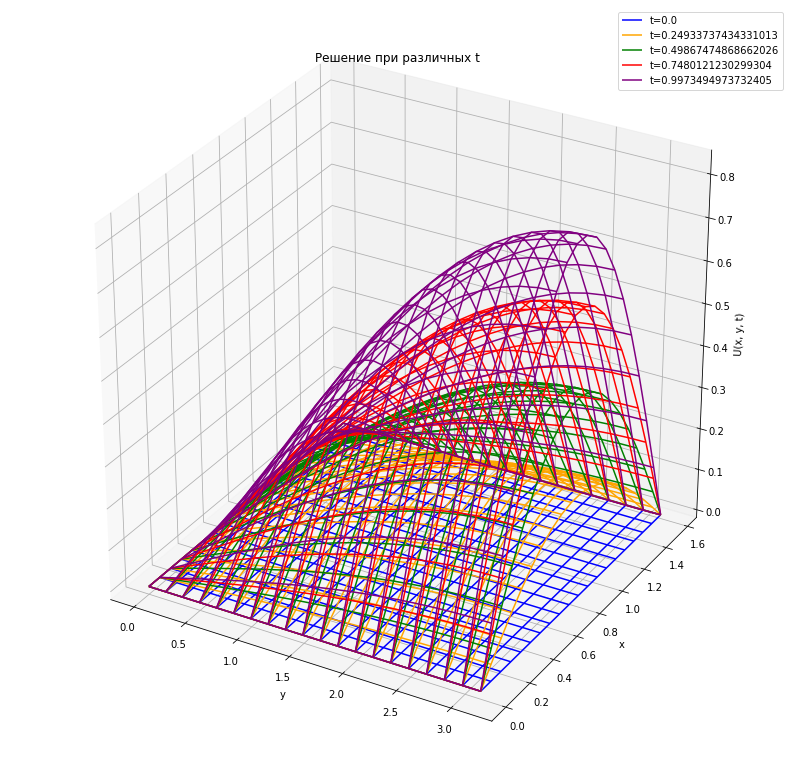

In [ ]:
plt.figure(figsize=(14, 14))
t = np.linspace(0, len(tAD) - 1, num=5, endpoint=True, dtype=int)

ax = plt.axes(projection='3d')

X, Y = np.meshgrid(xAD, yAD)

colors = [ 'b', 'orange','green', 'r', 'purple']
c = 0
for i in t:
    ax.plot_wireframe(Y, X, uAD[i], color = colors[c])
    c += 1

legends = ["t=" + str(tAD[i]) for i in t]
ax.legend(legends)
ax.set_xlabel("y")
ax.set_ylabel("x")
ax.set_zlabel("U(x, y, t)")

plt.title('Решение при различных t')

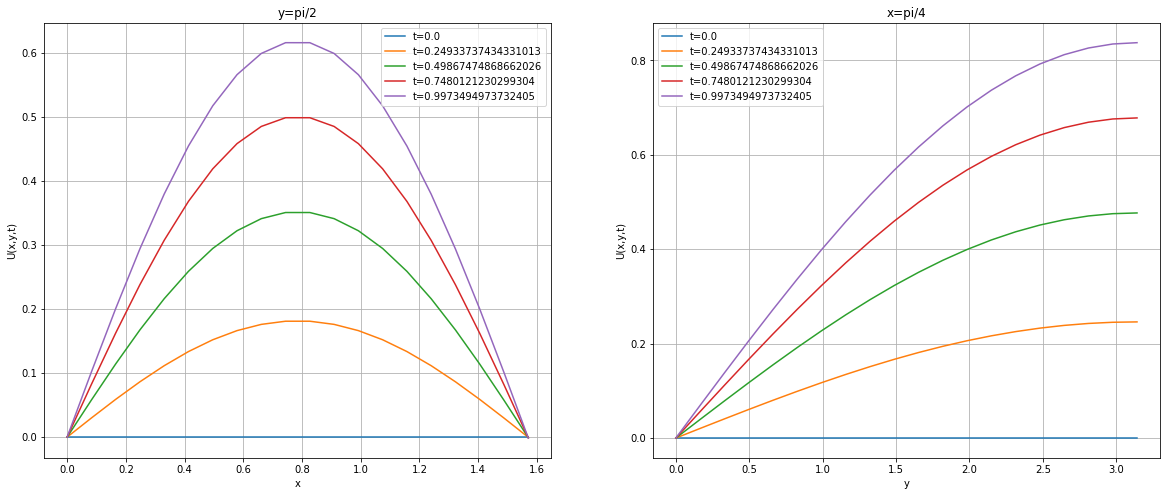

In [ ]:
f, axs = plt.subplots(1,2,figsize=(20,8))
t = np.linspace(0, len(tAD) - 1, num=5, endpoint=True, dtype=int)
for i in t:
  axs[0].plot(xAD,uAD[i][ny1 // 2])
legends = ["t=" + str(tAD[i]) for i in t]
axs[0].legend(legends)
axs[0].set_title("y=pi/2")
axs[0].set_xlabel("x")
axs[0].set_ylabel("U(x,y,t)")
axs[0].grid()

for i in t:
  tmp = []
  for j in range(len(yAD)):
    tmp.append(uAD[i][j][nx1 // 2])
  axs[1].plot(yAD, tmp)
legends = ["t=" + str(tAD[i]) for i in t]
axs[1].legend(legends)
axs[1].set_title("x=pi/4")
axs[1].set_xlabel("y")
axs[1].set_ylabel("U(x,y,t)")
axs[1].grid()

f.show()

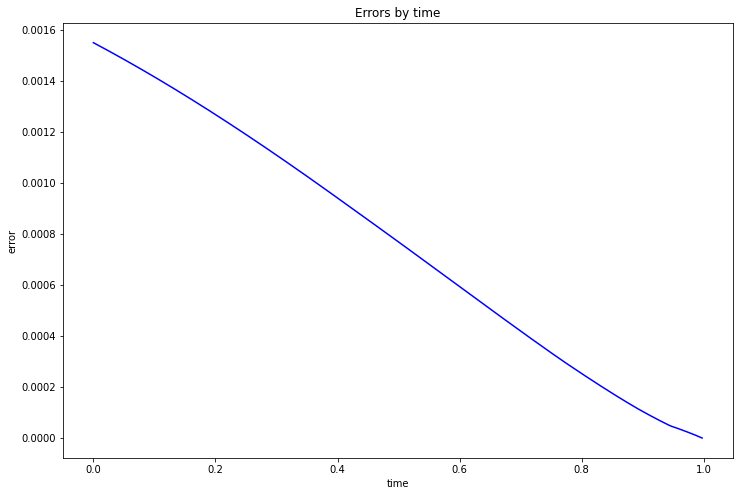

In [ ]:
errorsAD = [max([max(np.absolute(uAD[k][i] - realSolution[k][i])) for i in range(len(xAD))]) for k in range(len(tAD))]
plotErrorsByT(tAD, errorsAD)

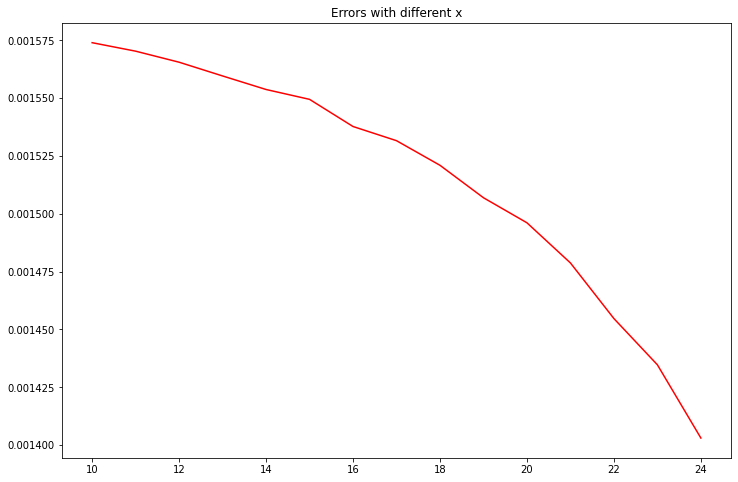

In [ ]:
plotErrors(data, "Alternative directions", 10, 'x', 15)

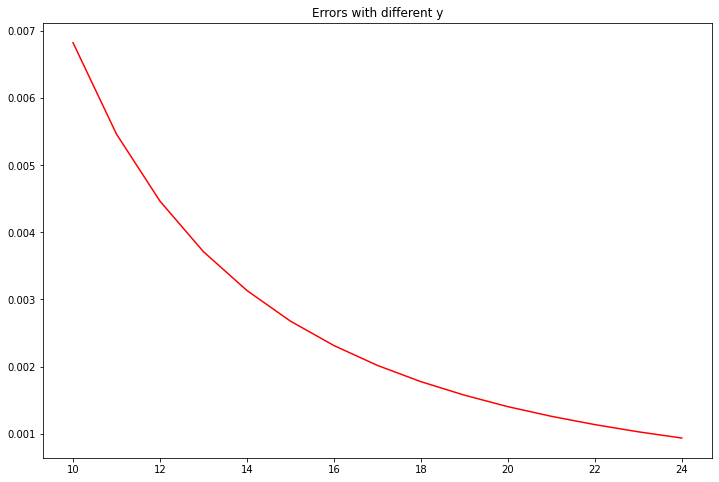

In [ ]:
plotErrors(data, "Alternative directions", 10, 'y', 15)

### Метод дробных шагов

Text(0.5, 0, 'U(x, y, t)')

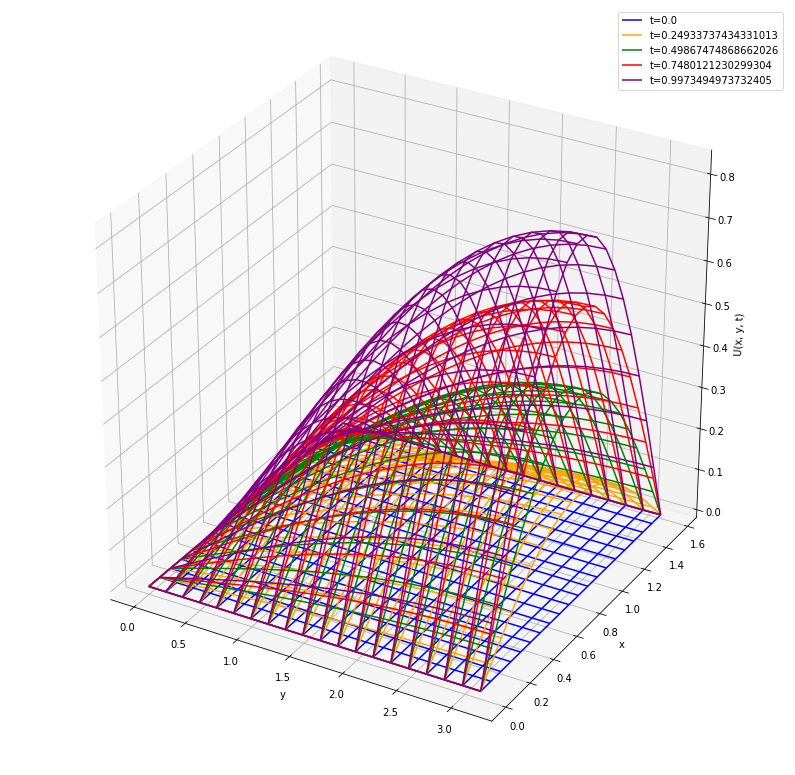

In [ ]:
plt.figure(figsize=(14, 14))
t = np.linspace(0, len(tFS) - 1, num=5, endpoint=True, dtype=int)


ax = plt.axes(projection='3d')

X, Y = np.meshgrid(xFS, yFS)

colors = [ 'b', 'orange','green', 'r', 'purple']
c = 0
for i in t:
    ax.plot_wireframe(Y, X, uFS[i], color = colors[c])
    c += 1

legends = ["t=" + str(tFS[i]) for i in t]
ax.legend(legends)
ax.set_xlabel("y")
ax.set_ylabel("x")
ax.set_zlabel("U(x, y, t)")




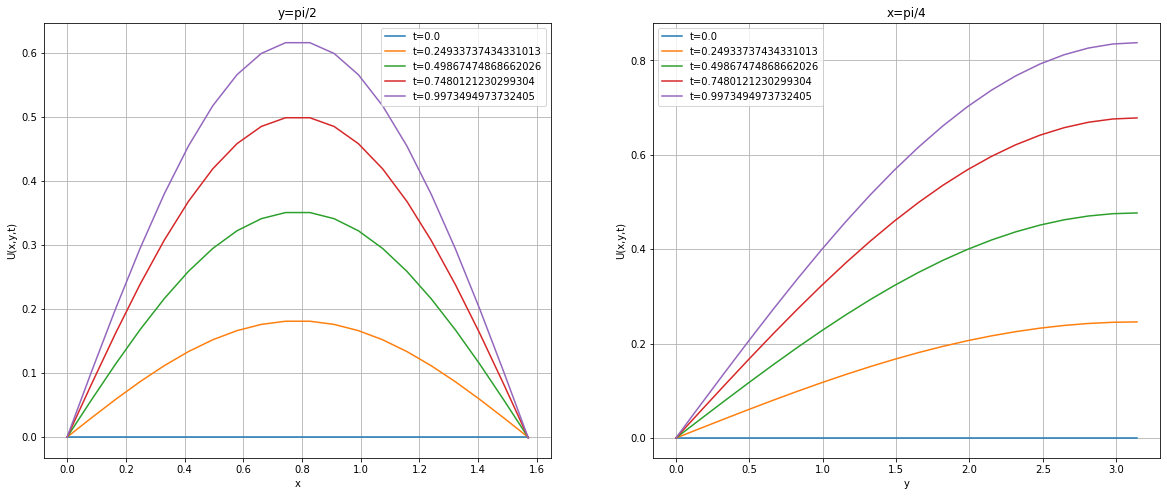

In [ ]:
f, axs = plt.subplots(1,2,figsize=(20,8))
t = np.linspace(0, len(tFS) - 1, num=5, endpoint=True, dtype=int)
for i in t:
  axs[0].plot(xFS,uFS[i][ny1 // 2])
legends = ["t=" + str(tFS[i]) for i in t]
axs[0].legend(legends)
axs[0].set_title("y=pi/2")
axs[0].set_xlabel("x")
axs[0].set_ylabel("U(x,y,t)")
axs[0].grid()

for i in t:
  tmp = []
  for j in range(len(yFS)):
    tmp.append(uFS[i][j][nx1 // 2])
  axs[1].plot(yFS, tmp)
legends = ["t=" + str(tFS[i]) for i in t]
axs[1].legend(legends)
axs[1].set_title("x=pi/4")
axs[1].set_xlabel("y")
axs[1].set_ylabel("U(x,y,t)")
axs[1].grid()

f.show()

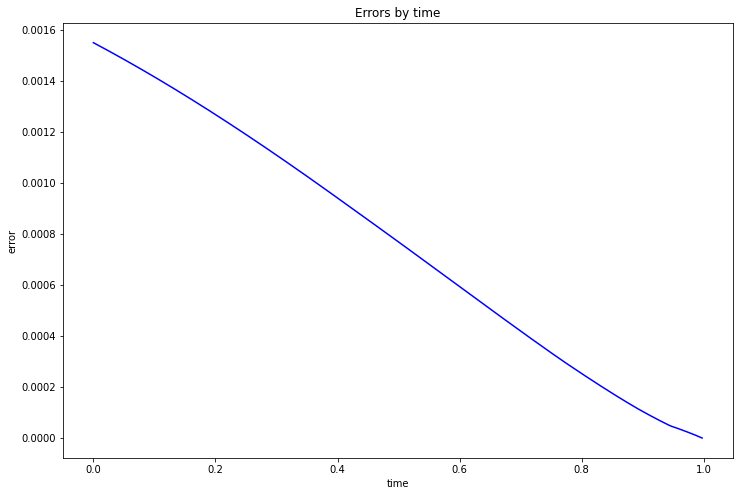

In [ ]:
errorsFS = [max([max(np.absolute(uAD[k][i] - realSolution[k][i])) for i in range(len(xAD))]) for k in range(len(tAD))]
plotErrorsByT(tFS, errorsFS)

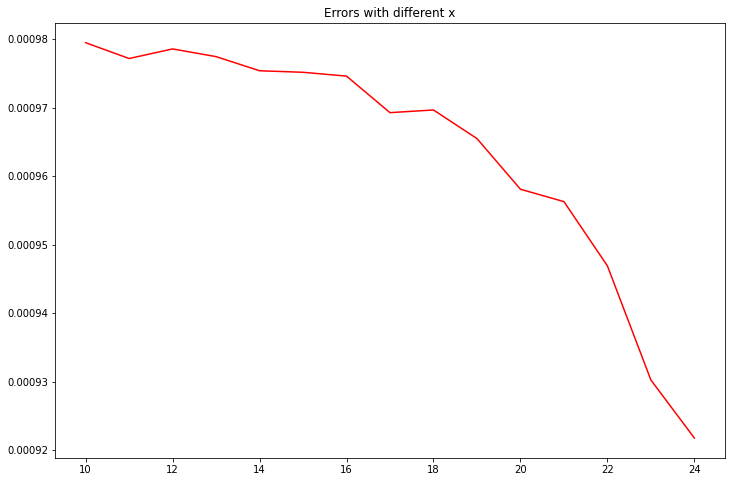

In [ ]:
plotErrors(data, "Fractional steps", 10, 'x', 15)

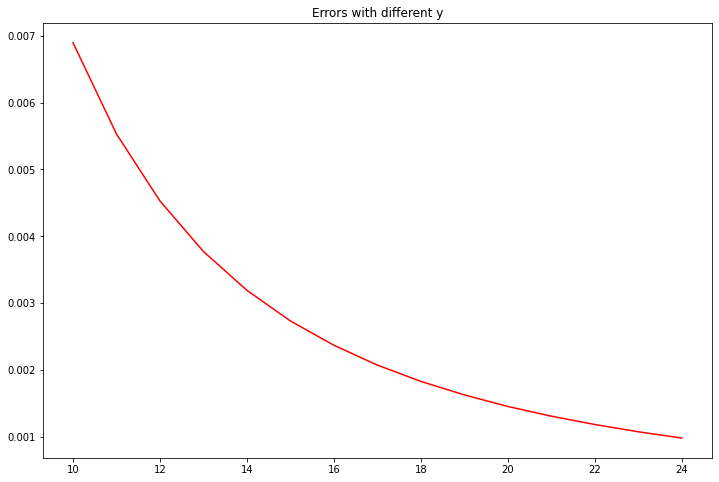

In [ ]:
plotErrors(data, "Fractional steps", 10, 'y', 15)

# Analytical Solution

Text(0.5, 0, 'U(x, y, t)')

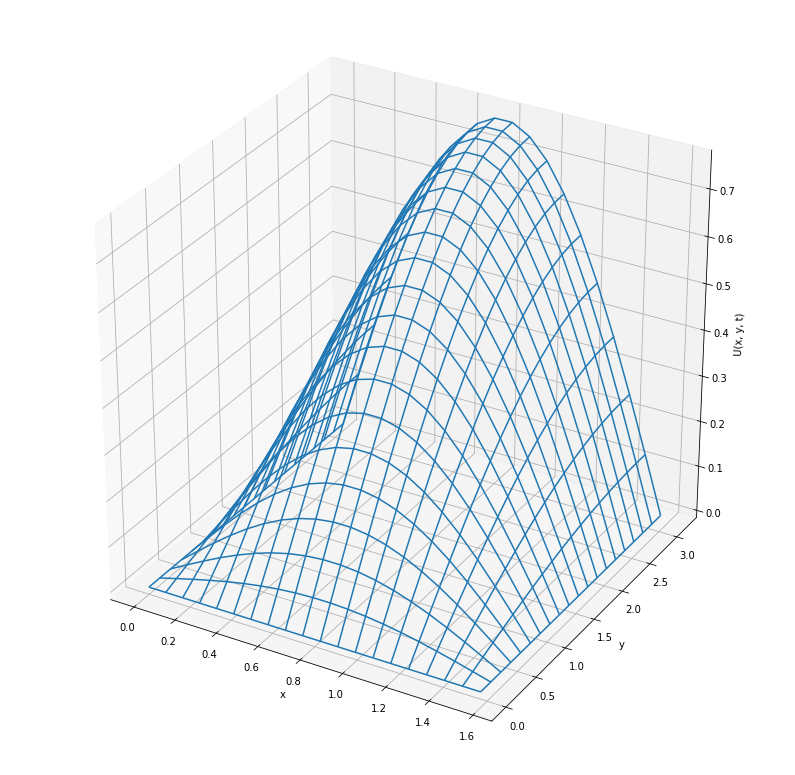

In [ ]:
plt.figure(figsize=(14, 14))

ax = plt.axes(projection='3d')

X, Y = np.meshgrid(xAD, yAD)


ax.plot_wireframe(X, Y, realSolution[400])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U(x, y, t)")

# Совместно

Text(0.5, 0.92, 'Решения методов в t = 0.8748679801519653')

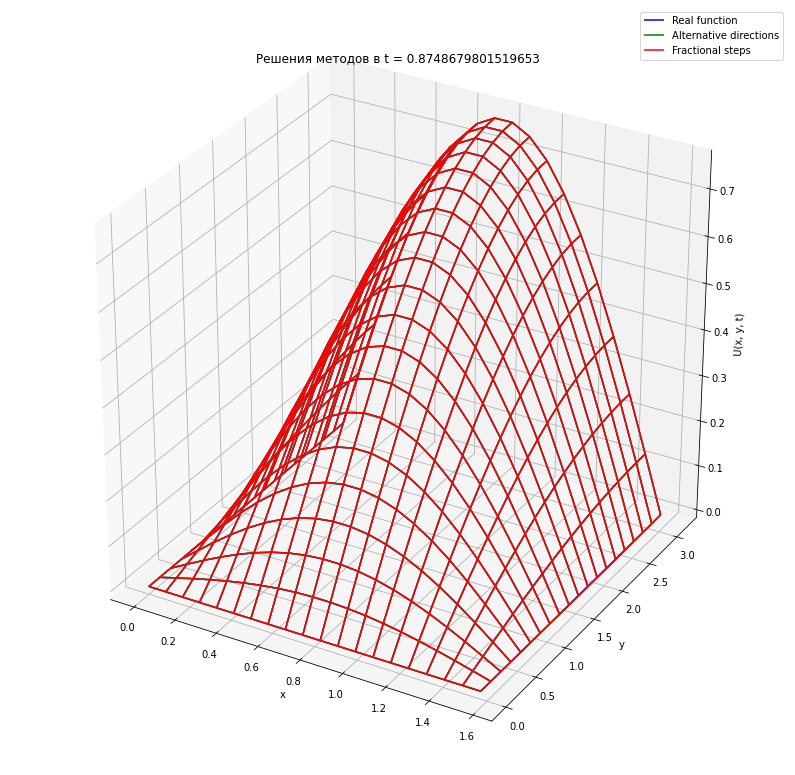

In [ ]:
id = 400

plt.figure(figsize=(14, 14))

ax = plt.axes(projection='3d')

X, Y = np.meshgrid(xAD, yAD)


ax.plot_wireframe(X, Y, realSolution[id], color = 'b', label='Real function')
ax.plot_wireframe(X, Y, uAD[id], color = 'g', label='Alternative directions')
ax.plot_wireframe(X, Y, uFS[id], color = 'r', label ='Fractional steps')
plt.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U(x, y, t)")

plt.title("Решения методов в t = " + str(tAD[id]))

#plt.legend(['Alternative directions', 'Fractional steps', 'Real function'])